In [68]:
from pathlib import Path

import os

import pandas as pd

In [69]:
%run "../read_and_write_docs.py"

In [70]:
%run "../scorer.py"

In [77]:
# Get the list of files in the rephrased sentences loc
# rephrased_sentences_loc = f"{g_drive_base_loc}datasets/blogger_new_algorithm/rephrased_sentences/"
# rephrased_sentences_loc = "../../../datasets/blogger/phi_rephrased"
rephrased_sentences_loc = "../../../../datasets/blogger/batch_4o"
save_score_dir = "../../../../datasets/blogger/openai_4o_parascore"

# Ensure the output directory exists
os.makedirs(save_score_dir, exist_ok=True)

files = [file for file in Path(rephrased_sentences_loc).iterdir() if file.is_file() and file.suffix == '.jsonl']
already_processed = [file for file in Path(save_score_dir).iterdir() if file.is_file() and file.suffix == '.jsonl']

In [78]:
already_processed

[PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_350617.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_202213.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_184355.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_214228.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_526719.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_334376.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_341238.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_530975.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_678838.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_481359.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_175880.jsonl'),
 PosixPath('../../../../datasets/blogger/openai_4o_parascore/doc_343349.jsonl'),
 PosixPath('../../../../data

In [88]:
# Convert processed files to a set of basenames (without directory path)
processed_basenames = {p.name for p in already_processed}

# Filter the unprocessed files by removing those that have already been processed
files_to_process = [p for p in files if p.name not in processed_basenames]

In [90]:
len(files_to_process)

84

In [59]:
df = read_jsonl_file(files[0])

In [60]:
df

,doc_id,chunk_id,original,rephrased
0,350617,1,Why does the Poet need a voice for his express...,What prompts the Poet's necessity for a voice ...
1,350617,1,Why does the Poet need a voice for his express...,Why must the Poet utilize a voice to convey hi...
2,350617,1,Why does the Poet need a voice for his express...,What is the necessity for the Poet to have a v...
3,350617,1,Why does the Poet need a voice for his express...,What makes it essential for the Poet to have a...
4,350617,1,Why does the Poet need a voice for his express...,Why must the Poet have a voice in order to exp...
...,...,...,...,...
2944,350617,9,Why cannot the Poets pragmatism (practicality)...,"Why can’t the Poet's practical, cynical, and p..."
2945,350617,9,Why cannot the Poets pragmatism (practicality)...,"Why are the Poet's pragmatism (practicality), ..."
2946,350617,9,Why cannot the Poets pragmatism (practicality)...,"What keeps the Poet's pragmatic, cynical, and ..."
2947,350617,9,Why cannot the Poets pragmatism (practicality)...,"What bars the Poet's practicality, cynicism, a..."


In [61]:
# Initialize with the score type 'parascore_free'
parascore_free = ParaphraseScorer(score_type='parascore_free', model_type='bert-base-uncased')

In [62]:
df_with_score = parascore_free.calculate_score(df)

In [63]:
df_with_score

,doc_id,chunk_id,original,rephrased,parascore_free
0,350617,1,Why does the Poet need a voice for his express...,What prompts the Poet's necessity for a voice ...,0.766186
1,350617,1,Why does the Poet need a voice for his express...,Why must the Poet utilize a voice to convey hi...,0.850781
2,350617,1,Why does the Poet need a voice for his express...,What is the necessity for the Poet to have a v...,0.804372
3,350617,1,Why does the Poet need a voice for his express...,What makes it essential for the Poet to have a...,0.753280
4,350617,1,Why does the Poet need a voice for his express...,Why must the Poet have a voice in order to exp...,0.794711
...,...,...,...,...,...
2944,350617,9,Why cannot the Poets pragmatism (practicality)...,"Why can’t the Poet's practical, cynical, and p...",0.765403
2945,350617,9,Why cannot the Poets pragmatism (practicality)...,"Why are the Poet's pragmatism (practicality), ...",0.859915
2946,350617,9,Why cannot the Poets pragmatism (practicality)...,"What keeps the Poet's pragmatic, cynical, and ...",0.700242
2947,350617,9,Why cannot the Poets pragmatism (practicality)...,"What bars the Poet's practicality, cynicism, a...",0.764708


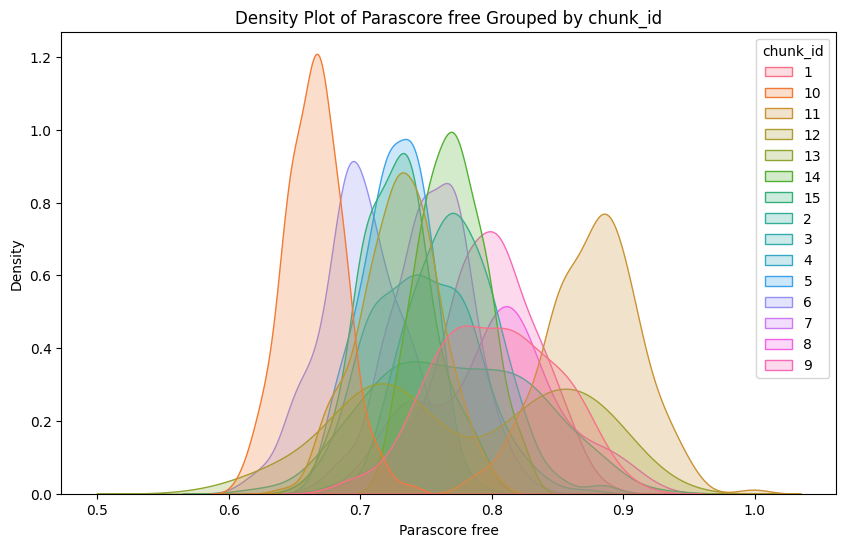

In [67]:
parascore_free.plot_density(df_with_score, grouping_column='chunk_id')

In [73]:
# Initialize with the score type 'parascore_free'
parascore_free = ParaphraseScorer(score_type='parascore_free', model_type='bert-base-uncased')

In [75]:
# Loop through each file in the files list
for file in files:
    # Load the DataFrame
    df = read_jsonl_file(file)
    
    # Calculate the score
    df_with_score = parascore_free.calculate_score(df)
    
    # Define the output file path
    output_file = os.path.join(save_score_dir, os.path.basename(file))
    
    # Save the modified DataFrame to the new location
    save_as_jsonl(df_with_score, output_file)

    print(f"Processed and saved: {output_file}")

Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_350617.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_202213.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_184355.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_214228.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_526719.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_334376.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_341238.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_530975.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_678838.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_481359.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_175880.jsonl
Processed and saved: ../../../../datasets/b

TypeError: object of type 'int' has no len()

In [93]:
failed_files = []

for file in files_to_process:
    print(f"Processing File: {file}")
    try:
        # Load the DataFrame
        df = read_jsonl_file(file)
    
        # Calculate the score
        df_with_score = parascore_free.calculate_score(df)
    
        # Define the output file path
        output_file = os.path.join(save_score_dir, os.path.basename(file))
    
        # Save the modified DataFrame to the new location
        save_as_jsonl(df_with_score, output_file)
        
        print(f"Processed and saved: {output_file}")
    
    except Exception as e:
        # If any error occurs, log the file that failed and the error message
        print(f"Failed to process {file}: {e}")
        failed_files.append(file)

Processing File: ../../../../datasets/blogger/batch_4o/doc_49343.jsonl
Failed to process ../../../../datasets/blogger/batch_4o/doc_49343.jsonl: object of type 'int' has no len()
Processing File: ../../../../datasets/blogger/batch_4o/doc_617540.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_617540.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_543206.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_543206.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_448015.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_448015.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_579188.jsonl


Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_579188.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_671397.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_671397.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_357437.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_357437.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_26252.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_26252.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_429760.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_429760.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_445957.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_445957.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_349665.jsonl
Processed and saved: ../../../../datasets/blogge

Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_323518.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_274759.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_274759.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_483447.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_483447.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_452954.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_452954.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_82243.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_82243.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_623524.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_623524.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_306438.jsonl
Processed and saved: ../../../../datasets/blogge

Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_398279.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_148224.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_148224.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_279772.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_279772.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_116471.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_116471.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_509577.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_509577.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_325534.jsonl
Processed and saved: ../../../../datasets/blogger/openai_4o_parascore/doc_325534.jsonl
Processing File: ../../../../datasets/blogger/batch_4o/doc_174699.jsonl
Processed and saved: ../../../../datasets/blog

In [94]:
# After the loop, you can review the files that failed
if failed_files:
    print("\nThe following files failed during processing:")
    for failed_file in failed_files:
        print(failed_file)


The following files failed during processing:
../../../../datasets/blogger/batch_4o/doc_49343.jsonl
